Minimum energy from fitted curve: -8.28398339305978 ev 
Corresponding volume: 191.5 (A)^3
Corresponding Lattice parameter: 5.763986116863368 A


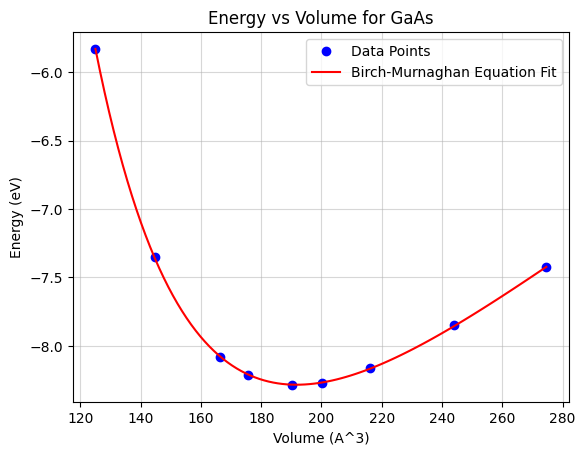

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Birch-Murnaghan equation
def birch_murnaghan(V, E0, V0, B0, Bp0):
    return (E0 +
            (9 * V0 * B0 / 16) * ((V0 / V)**(2/3) - 1)**2 *
            (1 + 0.75 * (Bp0 - 4) * ((V0 / V)**(2/3) - 1)))

# data
volume = [125, 144.703125, 166.375, 175.616, 190.109375, 200.201625, 216, 244.140625,
                    274.625]

energy = [-5.8305859, -7.3535429, -8.0795799, -8.2119429, -8.2854451, -8.267956, -8.1653173,
                    -7.8494767, -7.4251343]

# Initial guesses for parameters
initial_guess = [min(energy), volume[np.argmin(energy)], 1, 1]

# Fit the Birch-Murnaghan equation to the data with initial guesses
popt, pcov = curve_fit(birch_murnaghan, volume, energy, p0=initial_guess)

# Parameters
E0_fit, V0_fit, B0_fit, Bp0_fit = popt

# Generate fitted curve
volume_range = np.linspace(min(volume), max(volume), 100)
energy_fit = birch_murnaghan(volume_range, *popt)

# Find minimum energy from the fitted curve
min_energy_fit = min(energy_fit)

# Find corresponding volume
index_min_energy = np.argmin(energy_fit)
volume_min_energy = volume_range[index_min_energy]

print(f'Minimum energy from fitted curve: {min_energy_fit} ev ')
print(f'Corresponding volume: {volume_min_energy} (A)^3')

# Calculate lattice parameter
lattice_parameter = volume_min_energy**(1/3)

print(f'Corresponding Lattice parameter: {lattice_parameter} A')



# Plot the data and the fitted curve
plt.plot(volume, energy, 'bo', label='Data Points')
plt.plot(volume_range, energy_fit, 'r-', label='Birch-Murnaghan Equation Fit')
plt.xlabel('Volume (A^3)')
plt.ylabel('Energy (eV)')
plt.title('Energy vs Volume for GaAs')
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

# # Print the parameters
# print('Fitted Parameters:')
# print('E0:', E0_fit)
# print('V0:', V0_fit)
# print('B0:', B0_fit)
# print('Bp0:', Bp0_fit)
